In [ ]:
# Install necessary libraries (if not already installed)
!pip install tensorflow matplotlib numpy pillow

In [ ]:
!pip install beautifulsoup4 requests

In [ ]:
import os
import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin

In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image
from google.colab import files
import os

# Define paths
base_dir = '/content/data'
train_data_dir = base_dir

# Check directory structure and contents
for dirpath, dirnames, filenames in os.walk(train_data_dir):
    print(f'Found directory: {dirpath}')
    if filenames:
        print(f'Files: {filenames[:26]}...')  # Print first 5 files for brevity

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 20% validation data
)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Calculate steps per epoch
steps_per_epoch_train = len(train_generator)
steps_per_epoch_val = len(validation_generator)

print(f'Steps per epoch (training): {steps_per_epoch_train}')
print(f'Steps per epoch (validation): {steps_per_epoch_val}')

# Build the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(train_generator.class_indices), activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch_train,
    validation_data=validation_generator,
    validation_steps=steps_per_epoch_val,
    epochs=50
)




Found directory: /content/data
Found directory: /content/data/wings
Files: ['images (7).jpeg', 'wing2.jpg', 'download.jpeg', 'images (1).jpeg', '113082342-wing-of-airplane-flying-above-on-seashore-in-blue-sky.jpg', 'wing6.jpg', '5nwk6.jpg', 'Airplane-Wing-edited.jpg', 'wing4.jpg', 'b049e1399767afb8aa7780172f8ca17a.jpg', 'images (2).jpeg', 'wing3.jpg', 'wing1.jpg', 'airplane-wing-PLANEWINGBEND0517-9208b7abca474dd3be5d03ec86fe0b5f.jpg', 'aeroplane-4281914_1280.jpg', '360_F_495491796_MIQLk33JbOwCzkdIYXQiAgcPv2YIWDA6.jpg', 'images (3).jpeg', 'airplane-wing-air-HOWFLY0517-83e4a1fc774a4e63994d3433baea3554.jpg', 'wing.jpeg', 'images (6).jpeg', 'Aircraft wing tip.jpg', 'depositphotos_9919374-stock-photo-looking-over-aircraft-wing-in.jpg', 'images.jpeg', 'wing5.jpg', 'images (5).jpeg', 'images (4).jpeg']...
Found directory: /content/data/wings/.ipynb_checkpoints
Found directory: /content/data/tail
Files: ['bc4c2b011c43bc67efbf12824738d095ca3a4f6f.jpeg', 'tail6.jpg', 'images (1).jpeg', '6b037b97

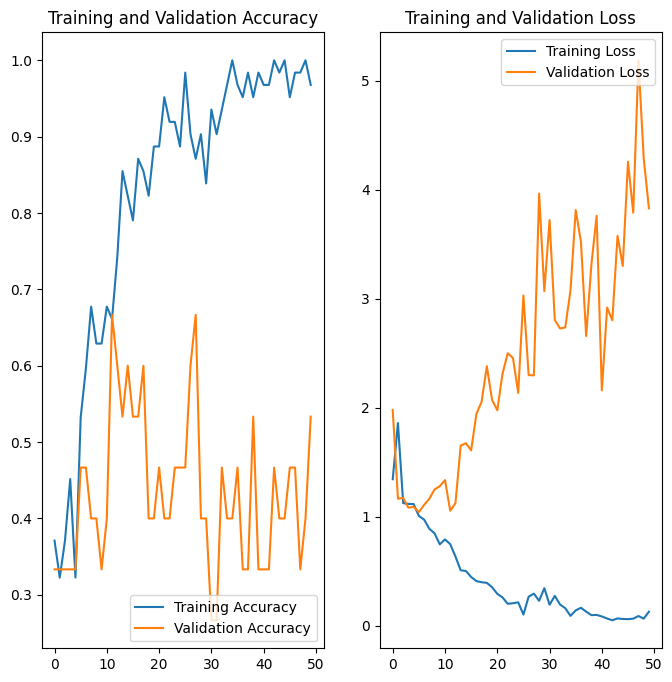

In [ ]:
# Plot training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(50)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Save the model
model.save('/content/aircraft_parts_classifier.h5')

Saving Jordan.jpg to Jordan.jpg
1/1 [==============================] - 0s 34ms/step


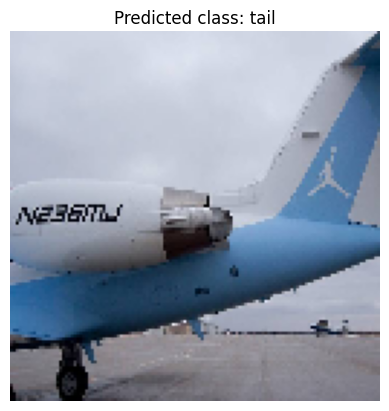

In [ ]:
def predict_image(img_path):
    img = image.load_img(img_path, target_size=(128, 128))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)
    class_labels = train_generator.class_indices
    class_labels = {v: k for k, v in class_labels.items()}
    predicted_label = class_labels[predicted_class[0]]
    return predicted_label, img

uploaded = files.upload()

for filename in uploaded.keys():
    predicted_class, uploaded_img = predict_image(filename)
    plt.imshow(uploaded_img)
    plt.axis('off')
    plt.title(f'Predicted class: {predicted_class}')
    plt.show()